<a href="https://colab.research.google.com/github/melikebsds/DuyguAnalizi/blob/main/Duygu_Analizi_Projesi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys,os
import tensorflow as tf
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Activation, Flatten  
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization,AveragePooling2D, MaxPool2D
from keras.losses import categorical_crossentropy  
from keras.optimizers import Adam  
from keras.regularizers import l2 
from keras.utils import np_utils
from keras.constraints import max_norm

ImportError: ignored

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

In [ ]:
df=pd.read_csv('/gdrive/My Drive/Proje/fer2013.csv')
print(df.head)

<bound method NDFrame.head of        emotion                                             pixels        Usage
0            0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...     Training
1            0  151 150 147 155 148 133 111 140 170 174 182 15...     Training
2            2  231 212 156 164 174 138 161 173 182 200 106 38...     Training
3            4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...     Training
4            6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...     Training
...        ...                                                ...          ...
35882        6  50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...  PrivateTest
35883        3  178 174 172 173 181 188 191 194 196 199 200 20...  PrivateTest
35884        0  17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...  PrivateTest
35885        3  30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...  PrivateTest
35886        2  19 13 14 12 13 16 21 33 50 57 71 84 97 108 122...  PrivateTest

[35887 rows x 3 colum

In [ ]:
X_train,train_y,X_test,test_y=[],[],[],[]  
for index, row in df.iterrows():  
    val=row['pixels'].split(" ")  
    if 'Training' in row['Usage']:
      X_train.append(np.array(val,'float32'))  
      train_y.append(row['emotion'])  
    elif 'PublicTest' and 'PrivateTest' in row['Usage']:  
      X_test.append(np.array(val,'float32'))  
      test_y.append(row['emotion'])

In [ ]:
num_features = 64  
num_labels = 7  
batch_size = 64  
epochs = 75
#sayıları float tipi arraye dönüştür
X_train = np.array(X_train,'float32')  
X_test = np.array(X_test,'float32') 
X_train.shape
train_y = keras.utils.to_categorical(train_y, 7)#7 kategoriye göre matris yapar
test_y = keras.utils.to_categorical(test_y, 7)

X_train = X_train.reshape(X_train.shape[0], 48, 48, 1)  
X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)
input_shape = (48 , 48, 1)

X_train /= 255 #verileri normalleştir
X_test /=255

In [ ]:
max_norm_value = 2.0
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), kernel_constraint=max_norm(max_norm_value), activation='relu', input_shape=input_shape, kernel_initializer='he_uniform'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.50))
model.add(Conv2D(64, kernel_size=(3, 3), kernel_constraint=max_norm(max_norm_value), activation='relu', input_shape=input_shape, kernel_initializer='he_uniform'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.50))
model.add(Conv2D(64, kernel_size=(3, 3), kernel_constraint=max_norm(max_norm_value), activation='relu', input_shape=input_shape, kernel_initializer='he_uniform'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.50))
model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_constraint=max_norm(max_norm_value), kernel_initializer='he_uniform'))
model.add(Dense(7, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 21, 21, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          3

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

from keras.callbacks import ModelCheckpoint
os.chdir('/gdrive/My Drive/Proje')
checkpointer = ModelCheckpoint(filepath='/face_model.h5', verbose=1, save_best_only=True)

# Fit data to model
hist = model.fit(X_train, train_y,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          callbacks=[checkpointer],
          validation_split=0.2
)

Epoch 1/75
359/359 [==============================] - 11s 10ms/step - loss: 2.3680 - accuracy: 0.2113 - val_loss: 1.8634 - val_accuracy: 0.2517

Epoch 00001: val_loss improved from inf to 1.86343, saving model to /face_model.h5
Epoch 2/75
359/359 [==============================] - 3s 9ms/step - loss: 1.8246 - accuracy: 0.2370 - val_loss: 1.8233 - val_accuracy: 0.2517

Epoch 00002: val_loss improved from 1.86343 to 1.82326, saving model to /face_model.h5
Epoch 3/75
359/359 [==============================] - 3s 9ms/step - loss: 1.8102 - accuracy: 0.2476 - val_loss: 1.8160 - val_accuracy: 0.2517

Epoch 00003: val_loss improved from 1.82326 to 1.81595, saving model to /face_model.h5
Epoch 4/75
359/359 [==============================] - 3s 9ms/step - loss: 1.8056 - accuracy: 0.2516 - val_loss: 1.8016 - val_accuracy: 0.2598

Epoch 00004: val_loss improved from 1.81595 to 1.80155, saving model to /face_model.h5
Epoch 5/75
359/359 [==============================] - 3s 9ms/step - loss: 1.7774 -

In [ ]:
model.save_weights("face_model.h5")

In [ ]:
scores = model.evaluate(X_test, test_y, verbose=1)
print(100*scores[1])
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

113/113 [==============================] - 0s 3ms/step - loss: 1.1032 - accuracy: 0.5834
58.34494233131409
Test loss: 1.1031887531280518
Test accuracy: 0.5834494233131409


In [ ]:
os.chdir('/gdrive/My Drive/Proje')
m_json = model.to_json()  
with open("face_model.json", "w") as json_file:  
    json_file.write(m_json)  

In [ ]:
from google.colab import files
files.download("face_model.json")
files.download("face_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

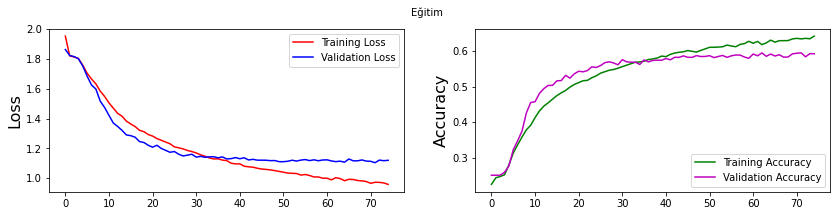

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.figure(figsize=(14,3))
plt.subplot(1, 2, 1)
plt.suptitle('Eğitim', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(hist.history['loss'], color ='r', label='Training Loss')
plt.plot(hist.history['val_loss'], color ='b', label='Validation Loss')
plt.legend(loc='upper right')


plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(hist.history['accuracy'], color ='g', label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], color ='m', label='Validation Accuracy')
plt.legend(loc='lower right')

plt.show()

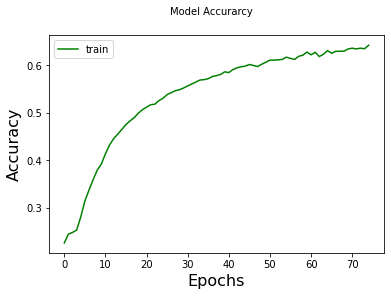

In [ ]:
plt.suptitle('Model Accurarcy', fontsize=10)
plt.plot(hist.history['accuracy'], color ='g', label='Training Accuracy')
plt.ylabel('Accuracy', fontsize=16)
plt.xlabel('Epochs', fontsize=16)
plt.legend(['train'],loc='upper left')
plt.show()

In [ ]:
scores = model.evaluate(X_test, test_y, verbose=1)
print(100*scores[1])
print('loss:', scores[0])
print('accuracy:', scores[1])

113/113 [==============================] - 0s 3ms/step - loss: 1.1032 - accuracy: 0.5834
58.34494233131409
loss: 1.1031887531280518
accuracy: 0.5834494233131409
